# CIS 5450 Final Project: Amazon Book Reviews 
_Due: December 15th, 11:59 PM EST_ 

<br>
<center><img src = "https://cdn.dribbble.com/users/112264/screenshots/1505195/media/4a0c791a7792be31e4367fb0b7b0835e.png?compress=1&resize=400x300&vertical=top" width= "300" height= '200' align ="center"/></center>
<br>


# Team Members

The team members who worked on this project were **Grace Benner, Naomi Maranga, and Kofi Nightingale** and we were advised by TA **Ernest Ng**



#Project Goals

<div class = "row">
<div class="column">
We intend to study correlations between features of book reviews on Amazon including sentiment analysis on reviews of books across genres, total number of reviews per book, effect of price on book popularity, predicting public sentiment on book authors from reviews of their work(e.g public opinion on figures such as Dr. Seuss or J.K. Rowling etc.)

Ultimately, we'd like to predict the number of ratings a book has(ratingsCount) using a variety of features on books(some which are given and some which we'd have to feature engineer.)

Some models we're currently considering include logistic regression, KNN, LDA/QDA, and random forest since ratingsCount is a quantitative feature hence lending our project into the regression category. 

We will also be primarily working with pandas dataframes and operations thereof in conjunction with SQL queries. We will also utilize Apache Spark to delve into the merits of parallelization
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://miro.medium.com/max/1400/0*NNTTYmmYvGHvca5S" height= "200" align ="center"/>
<img src = "https://ces-sarahboucher.weebly.com/uploads/2/4/7/8/24789555/predict_orig.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

# Value Proposition 
 We find this project to be interesting since we think that ratingsCount as a feature gives us an overall idea of book popularity. The more ratings say a book has, the more popular it is. We are interested in finding which features predict or could predict a "best-selling" book

We'd also be interested in looking into collaborative filtering and thus tinker a little bit with recommender systems

# Data Sources and Attributions

Our source dataset is acquired from the Kaggle Dataset "Amazon Book Reviews": https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews

This dataset is built from two main sources:
 1. The first source is https://jmcauley.ucsd.edu/data/amazon/ Citation Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering R. He, J. McAuley WWW, 2016 Image-based recommendations on styles and substitutes J. McAuley, C. Targett, J. Shi, A. van den Hengel SIGIR, 2015 
 2. The second source is Google books API
 The data details file in particular is built by using [google books API](https://developers.google.com/books/docs/overview) to get detailed information about books under consideration

**This dataset is in the public domain and is expected to be updated monthly.**


## Part 0: Libraries, Packages, and General Set Up 

In [7]:
#imports 
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




# You get a book, you get a book, everyone gets a book!

<br>
<center><img src = "https://media.makeameme.org/created/you-get-a-5ba267.jpg" width= "500" align ="center"/></center>
<br>



We'll be loading our data into various dataframes and querying them. We'll also be exploring the following attributes of the book reviews data: 
- Book-specific metadata such as author names
- The books' rankings 
- Number of reviews which correspond to the number of rows in our dataframe. 


#Part 1: Data Cleaning and EDA

We will first load our datasets into a Pandas Dataframe. 

#### **TODO**
- Save the Book Details dataframe to a variable named: <code>books_df</code>
- Save the Reviews dataframe to a variable named: <code>reviews_df</code>
- Inspect the types of each column in the dataframe


In [9]:
books_df = pd.read_csv("/content/drive/MyDrive/books_data.csv")

In [10]:
books_df.dtypes

Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object

In [11]:
books_df.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [12]:
reviews_df = pd.read_csv("/content/drive/MyDrive/Books_rating.csv")

In [13]:
reviews_df.dtypes

Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

In [14]:
reviews_df.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


##1.1 Cleaning the Data 

We'd like to account for NaNs, duplicates or columns that don't give much insight into the data during our EDA step. We could either use imputation or drop columns that are irrelevant to our end goal. 
P.S: **remember to drop the unnecessary columns before filtering out rows with nulls**



<br>

#### **TODO: 1.1**

- Keep only the relevant columns: 
- Drop rows that have nulls (e.g. NaN) in them
- Make any necessary type casts that would make our data analysis easier
- Save the output to `cleaned_books_df` and `cleaned_reviews_df`

#### **Cleaning Books Data**

#####*Drop Unnecessary Columns*

In [15]:
cleaned_books_df = books_df.drop(columns = ["image", "previewLink", "infoLink"])

#####*Deal with Null Values*

In [16]:
#Ratings count
cleaned_books_df[["ratingsCount"]].describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


Since ratings count's minimum value is 1, it is safe to assume that the null values in this column relate to a ratings count of 0. We will impute the null values with 0.

In [17]:
cleaned_books_df["ratingsCount"] = cleaned_books_df["ratingsCount"].fillna(0.0)

In [18]:
print(len(cleaned_books_df))
print(len(cleaned_books_df.dropna()))

212404
120867


This dataset is very large. Even after dropping the null values we have over 100,000 books to analyze. Since we will be using these data to model with, it is best to just drop the null values now.

In [19]:
cleaned_books_df = cleaned_books_df.dropna().reset_index()

#####*Cleaning Date Published*

In [20]:
cleaned_books_df[["publishedDate"]].head(10)

,publishedDate
0,2005-01-01
1,2005-02
2,1996
3,2009-01-01
4,1995
5,1994-02-17
6,2018-11-06
7,2012-12-06
8,2018-02-27
9,2010-01-28


Unfortunately some dates are in the form YYYY-MM-DD, some are in the form YYYY-MM, and others YYYY. Let's create a new column `published_year` since imputation is not as appropriate for the missing months and days.

In [21]:
cleaned_books_df["published_year"] = cleaned_books_df["publishedDate"].str[:4]

In [22]:
cleaned_books_df = cleaned_books_df.drop(columns = ["publishedDate", "index"])

#####*Cleaning Publisher*

We noticed some inconcistancies with the publisher name. For example, both "Harper Collins" and "HarperCollins" are values. We are going to concatenate the publisher names to address this.

In [23]:
import re
cleaned_books_df["publisher"] = cleaned_books_df["publisher"].apply(lambda x: re.sub('[\W_]+', '', x))

#####*New Variables using Authors and Categories*

The variables `authors` and `categories` are lists. Create new variables, `num_authors` and `num_categories` to correspond to the number of authors and categories each book has. These may be of value when predicting the ratings count.

In [24]:
def count_list(str):
  count = 1
  for i in range(len(str)):
    if str[i] == ",":
      count +=1
  return count

cleaned_books_df["num_authors"] = cleaned_books_df["authors"].apply(lambda x: count_list(x))
cleaned_books_df["num_categories"] = cleaned_books_df["categories"].apply(lambda x: count_list(x))

#### **Cleaning Reviews Data**

#####*Drop Unnecessary Columns*

In [25]:
cleaned_reviews_df = reviews_df.drop(columns = ['Id', 'profileName', 'review/time'])

#####*Deal with Null Vlaues*

What should we do with the variable `Price`?


*   Almost 84% of values for `Price` are null.
*   This is too high of a percentage to be able to knowledgably impute the nulls.
*   Let's drop `Price`







In [26]:
cleaned_reviews_df[['Price']].isna().sum() / len(cleaned_reviews_df)

Price    0.83961
dtype: float64

In [27]:
cleaned_reviews_df = cleaned_reviews_df.drop(columns = ['Price'])

The only other variable with a high proportion of null values is `User_id`. Since `User_id` will only be used in EDA, and will not be a part of merging the datasets or modeling, we will keep these null values.

Otherwise, all other variables have a very low proportion of null values (if they even have any at all), so we will go ahead and drop the rows with nulls in all the columns besides `User_id`.

In [28]:
cleaned_reviews_df[['User_id']].isna().sum() / len(cleaned_reviews_df)

User_id    0.187262
dtype: float64

In [29]:
cleaned_reviews_df = cleaned_reviews_df.dropna(subset = ['Title', 'review/helpfulness',
                                                         'review/score', 'review/summary', 'review/text'])

#####*Rename Columns* 

In [30]:
cleaned_reviews_df = cleaned_reviews_df.rename(columns = {"review/helpfulness":"review_helpfulness_rating",
                                                          "review/score":"review_score",
                                                          "review/summary": "review_summary",
                                                          "review/text":"review_text"})

#####*Create a Percent Helpful Rating Column* 

There is a column in the reviews dataframe called `review_helpfulness_rating` (originally `review/helpfulness`). This column gives the number of people who found the review helpful (x) over the number of people who rated this review (y) in the format x/y. 

We will create a new column `review_percent_helpful` which finds the percentage of helpfulness for the given review. 

*   If there are zero ratings for the review (i.e.  `review_helpfulness_rating` == '0/0'), set the `review_percent_helpful` to 0

In [31]:
def percent_helpful(str):
  items = str.split("/")
  if (int(items[1]) == 0):
    percent_helpful = 0.0
  else:
    percent_helpful = int(items[0]) / int(items[1]) * 100
  return round(percent_helpful, 2)

cleaned_reviews_df["review_percent_helpful"] = cleaned_reviews_df["review_helpfulness_rating"].apply(lambda x: percent_helpful(x))

#####*Create a Categorical Review Score Column* 

We will classify a positive review score as having a `review_score` greater than or equal to 4.0. 


*   If `review_score` >= 4.0 then `cat_review_score` = 'positive'
*   If 2.0 < `review_score` < 3.0 then `cat_review_score` = 'neutral'
*   If `review_score` <= 2.0 then `cat_review_score` = 'negative'




In [32]:
def cat_review(review_score):
  if review_score >= 4.0:
    cat_review = "positive"
  elif review_score > 2.0:
    cat_review = "neutral"
  else:
    cat_review = "negative"

  return cat_review


cleaned_reviews_df["positive_review_score"] = cleaned_reviews_df["review_score"].apply(lambda x: cat_review(x))

### 1.1.2 Our Sandbox 

In our little sandbox, we will do some high-level exploratory data analysis (EDA) to familiarize ourselves with the books and reviews datasets, after the files have been cleaned. Some tools we've found useful in the past include: 
- `df.head()`
- `df.describe()`
- `df.info()`
- `Series.unique()`

<br>
<center><img src = "https://res.cloudinary.com/hy4kyit2a/f_auto,fl_lossy,q_70/learn/modules/nonprofit-success-pack-maintenance/set-up-a-sandbox-in-your-salesforce-org/images/a8e6e5b50adddd6a6baa82854889c0fb_salesforcelandian-npsp-scenes-image-2-building-sand-castles-2.png" width= "300" height='300' align ="center"/></center>
<br>


#### **Books Data**

In [33]:
cleaned_books_df.head(5)

,Title,description,authors,publisher,categories,ratingsCount,published_year,num_authors,num_categories
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],ACBlack,['Biography & Autobiography'],0.0,2005,1,1
1,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,['Fiction'],0.0,2005,1,1
2,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],WmBEerdmansPublishing,['Religion'],5.0,1996,1,1
3,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],TanBooksPub,['Biography & Autobiography'],0.0,2009,1,1
4,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],PlymptonPressIntl,['Social Science'],0.0,1995,1,1


In [34]:
cleaned_books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120867 entries, 0 to 120866
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Title           120867 non-null  object 
 1   description     120867 non-null  object 
 2   authors         120867 non-null  object 
 3   publisher       120867 non-null  object 
 4   categories      120867 non-null  object 
 5   ratingsCount    120867 non-null  float64
 6   published_year  120867 non-null  object 
 7   num_authors     120867 non-null  int64  
 8   num_categories  120867 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 8.3+ MB


In [35]:
cleaned_books_df.describe()

,ratingsCount,num_authors,num_categories
count,120867.000000,120867.000000,120867.000000
mean,8.105033,1.313568,1.021056
std,127.075136,0.958524,0.150384
min,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,4895.000000,110.000000,5.000000


#### **Reviews Data**

In [36]:
cleaned_reviews_df.head(5)

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive


In [37]:
cleaned_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999746 entries, 0 to 2999999
Data columns (total 8 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Title                      object 
 1   User_id                    object 
 2   review_helpfulness_rating  object 
 3   review_score               float64
 4   review_summary             object 
 5   review_text                object 
 6   review_percent_helpful     float64
 7   positive_review_score      object 
dtypes: float64(2), object(6)
memory usage: 206.0+ MB


In [38]:
cleaned_reviews_df.describe()

,review_score,review_percent_helpful
count,2.999746e+06,2.999746e+06
mean,4.215262e+00,4.924238e+01
std,1.203067e+00,4.309176e+01
min,1.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00
50%,5.000000e+00,5.000000e+01
75%,5.000000e+00,1.000000e+02
max,5.000000e+00,3.000000e+02


In [39]:
len(cleaned_reviews_df['Title'].unique())

212401

In [40]:
len(cleaned_reviews_df['User_id'].unique())

1008950

##1.2 EDA with Books Data

Since we have cleaned our datasets, and examined them on a high-level, it is now time to do some exploratory data analysis (EDA) with our data. Let's first take a look at `cleaned_books_df` and answer some interesting questions about the data, as well as visualize. 

We eventually will be using the `ratingsCount` variable as the label in some ML models, so this EDA will mostly focus on how other variables relate to `ratingsCount`.


#####*Top 10 Most Rated Books*

In [41]:
books_df = cleaned_books_df[['Title', 'authors', 'ratingsCount']].sort_values(by='ratingsCount', ascending = False).head(10).reset_index().drop(columns = 'index')
books_df['authors'] = books_df['authors'].apply(lambda x: x[2:len(x) -2])
books_df

,Title,authors,ratingsCount
0,The Alchemist,Paulo Coelho,4895.0
1,Unbroken,Laura Hillenbrand,4572.0
2,A Mission to Millions; The Story of Ernie Alle...,Laura Hillenbrand,4572.0
3,Blue Like Jazz: Nonreligious Thoughts on Chris...,Donald Miller,4562.0
4,Eclipse,Stephenie Meyer,4392.0
5,Redeeming Love,Francine Rivers,4249.0
6,A Walk in the Woods,Bill Bryson,4234.0
7,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,4218.0
8,"Travel Light, Eat Heavy Along the Appalachian ...",Bill Bryson,4161.0
9,Henrietta,Rebecca Skloot,4067.0


#####*Top 10 Most Rated Publishers*

In [42]:
pub_df = cleaned_books_df[['publisher', 'ratingsCount']].groupby(by='publisher').sum().sort_values(by='ratingsCount', ascending = False).head(10).reset_index()
pub_df

,publisher,ratingsCount
0,Penguin,88714.0
1,HarperCollins,73759.0
2,SimonandSchuster,51226.0
3,RandomHouse,48706.0
4,Vintage,40755.0
5,KnopfBooksforYoungReaders,27173.0
6,Macmillan,23341.0
7,LittleBrown,17399.0
8,HachetteUK,15430.0
9,Bantam,14825.0


#####*Top 10 Most Rated Categories*

In [43]:
cats_df = cleaned_books_df[['categories', 'ratingsCount']].groupby(by='categories').sum().sort_values(by='ratingsCount', ascending = False).head(10).reset_index()
cats_df['categories'] = cats_df['categories'].apply(lambda x: x[2:len(x) -2])
cats_df

,categories,ratingsCount
0,Fiction,406179.0
1,Juvenile Fiction,98825.0
2,Biography & Autobiography,90803.0
3,Religion,32990.0
4,History,32115.0
5,Travel,28624.0
6,Young Adult Fiction,28508.0
7,Business & Economics,25425.0
8,Philosophy,22215.0
9,"Abnormalities, Human",20496.0


#####*Year Published vs. Average Ratings Count*

We want to see if there is a relationship between the year a book was published and the mean ratings count.

*  We are only curious about modern books - let's filter on having been published in the 21st century.
*  Since the majority value of `ratingsCount` is 0, let's also filter on books having at least 1 rating.



In [44]:
#TODO
books_2000s = cleaned_books_df[cleaned_books_df['published_year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]
books_2000s = books_2000s[books_2000s['ratingsCount'] > 0]
avg_yearly_ratings = books_2000s[['published_year', 'ratingsCount']].groupby(by = 'published_year').mean().reset_index()

In [45]:
import plotly.express as px
fig = px.line(avg_yearly_ratings, x= 'published_year', y='ratingsCount', title='Average Ratings Count for 21 year period',
              labels = {'published_year':'Year of Publish', 'ratingsCount': 'Average ratingsCount'}, markers=True)
fig.show()

#####*Number of Authors and Categories vs. Ratings Count*

Do the number of authors of a given book or the number of categories of a given book relate to the average ratings count?

*   Since it is not common for books to have more than 5 authors or categories we will limit on that.
*   Again we will examine books with a `ratingsCount` greater than 0.



In [46]:
num_books = cleaned_books_df[cleaned_books_df['num_authors'] <= 5]
num_books = num_books[num_books['num_categories'] <= 5]
num_books = num_books[num_books['ratingsCount'] > 0]
num_books = num_books[['ratingsCount', 'num_authors', 'num_categories']]

In [47]:
num_auths = num_books[['ratingsCount', 'num_authors']].groupby('num_authors').mean().reset_index().rename(columns = {'num_authors':'num'})
num_cats = num_books[['ratingsCount', 'num_categories']].groupby('num_categories').mean().reset_index().rename(columns = {'num_categories':'num'})
num_auths['Type'] = 'Number of Authors'
num_cats['Type'] = 'Number of Categories'

In [48]:
plot_df = pd.concat([num_cats, num_auths])

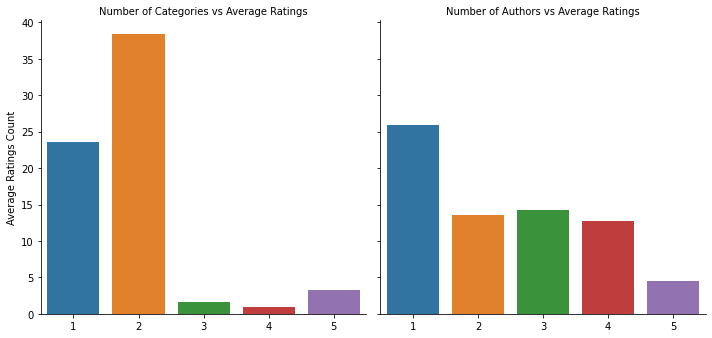

In [49]:
plot2 = sns.catplot(data = plot_df, x = 'num', y = 'ratingsCount', kind="bar", col = 'Type', dodge = False)
plot2.set_axis_labels("", "Average Ratings Count")
plot2.set_titles("{col_name} vs Average Ratings")
plt.show(plot2)

## Part 1.3: EDA with Reviews Data
Now that we're more familiar with the dataset, we will try and extract some information on which books seem to be popular by their total ratings, total number of reviews, percentile rankings, highly ranked authors etc. 


###1.3.1 Finding the popular books



#### 1 Extracting total ratings
We now want to see which books were ranked highest. We can measure book popularity using the total number of reviews, dubbed reviewsCount, the book had.

We will be using the `cleaned_reviews_df` dataframe in this section.






In [50]:
cleaned_reviews_df.head()

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive


In [51]:
# Get number of reviews per title, dubbed reviewsCount, from reviews table --- should somewhat line up with ratingsCount
num_reviews = cleaned_reviews_df[['Title', 'review_score']].groupby('Title').count().reset_index().rename(columns={'review_score': 'reviewsCount'}).sort_values(by='reviewsCount',ascending=False)

The number of reviews per title doesn't actually add up with the ratingsCount number from the books data. Let's do some more exploration on the books with most number of reviews as listed above


*   Extract the top ten books with the number of reviews
*   Find the books with the most number of **positive** reviews



In [52]:
top10_reviewed = num_reviews.head(10)
top10_reviewed

,Title,reviewsCount
166772,The Hobbit,22023
123880,Pride and Prejudice,20371
17627,Atlas Shrugged,12513
210376,Wuthering Heights,10780
164670,The Giver,7644
67537,Great Expectations,7421
70370,Harry Potter and The Sorcerer's Stone,6796
113063,Of Mice and Men,6728
26051,Brave New World,6312
102195,Mere Christianity,6053


In [53]:
positive_reviews_df = cleaned_reviews_df[cleaned_reviews_df['positive_review_score'] == 'positive']
num_positive_reviews = positive_reviews_df[['Title','review_score']].groupby('Title').count().reset_index().rename(columns={'review_score': 'pos_reviewsCount'}).sort_values(by='pos_reviewsCount',ascending=False)

top10_positive_reviewed = num_positive_reviews.head(10)
top10_positive_reviewed

,Title,pos_reviewsCount
156262,The Hobbit,20455
115905,Pride and Prejudice,18013
16487,Atlas Shrugged,9216
197291,Wuthering Heights,7992
154251,The Giver,6442
65804,Harry Potter and The Sorcerer's Stone,6395
63184,Great Expectations,5747
105755,Of Mice and Men,5746
95586,Mere Christianity,5242
24385,Brave New World,5144



Let's find the percentage of positive reviews per title:
* Rank by number of reviews and percentage of positive reviews in descending order



In [54]:
percent_pos_reviews = num_reviews.merge(num_positive_reviews,left_on='Title',right_on='Title', suffixes=[None,'_y']).rename(columns={'reviewsCount_y':'num_pos_reviews'})
percent_pos_reviews['percent_pos_reviews'] = percent_pos_reviews['pos_reviewsCount'] / percent_pos_reviews['reviewsCount']
percent_pos_reviews.sort_values(by=['reviewsCount','percent_pos_reviews'],ascending=[False,False]).head(10)

,Title,reviewsCount,pos_reviewsCount,percent_pos_reviews
0,The Hobbit,22023,20455,0.928802
1,Pride and Prejudice,20371,18013,0.884247
2,Atlas Shrugged,12513,9216,0.736514
3,Wuthering Heights,10780,7992,0.741373
4,The Giver,7644,6442,0.842752
5,Great Expectations,7421,5747,0.774424
6,Harry Potter and The Sorcerer's Stone,6796,6395,0.940995
7,Of Mice and Men,6728,5746,0.854043
8,Brave New World,6312,5144,0.814956
9,Mere Christianity,6053,5242,0.866017


### Visualization

Plot a multi-bar graph of number of reviews and the number of positive reviews per title of top 10 most rated books

In [55]:
bar_reviews = percent_pos_reviews[['Title','reviewsCount','pos_reviewsCount']].head(10)
bar_reviews
# Plot grouped bar chart with number of reviews and number of positive reviews side by side
fig = px.bar(bar_reviews, x='Title', y=["reviewsCount",'pos_reviewsCount'],
             barmode='group', labels={'value': 'Number of reviews', 'Title': 'Book Title','variable':'Split'},
             title = 'Distribution of Positive Reviews per Book for Top 10 Most Reviewed Books', height=600)
fig.show()

#Part 1.4: Combining the Data 

Since our data is spread out across two primary dataframes, books and reviews, it might be useful to aggregate the data for further use.

In doing so, some more EDA can be done with the combined fields to reveal more interesting trends and statistics about the relation between the two dataframes.

In [56]:
#TODO
cleaned_books_df.head()

,Title,description,authors,publisher,categories,ratingsCount,published_year,num_authors,num_categories
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],ACBlack,['Biography & Autobiography'],0.0,2005,1,1
1,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,['Fiction'],0.0,2005,1,1
2,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],WmBEerdmansPublishing,['Religion'],5.0,1996,1,1
3,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],TanBooksPub,['Biography & Autobiography'],0.0,2009,1,1
4,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],PlymptonPressIntl,['Social Science'],0.0,1995,1,1


In [57]:
#TODO
cleaned_reviews_df.head()

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive


Observing the books and reviews dataframe, relevant fields that we would like to join for our analysis include: 
- From Books dataframe: Title, authors, publisher and categories 
- From Reviews dataframe: review_summary, review_score, positive_review_score

In [58]:
#TODO
combined_df = cleaned_books_df.merge(cleaned_reviews_df, on = 'Title', how='right',indicator=True)[['Title','publisher','published_year','categories','review_summary','review_score','positive_review_score']]

In [59]:
combined_df.head()

,Title,publisher,published_year,categories,review_summary,review_score,positive_review_score
0,Its Only Art If Its Well Hung!,NaN,NaN,NaN,Nice collection of Julie Strain images,4.0,positive
1,Dr. Seuss: American Icon,ACBlack,2005,['Biography & Autobiography'],Really Enjoyed It,5.0,positive
2,Dr. Seuss: American Icon,ACBlack,2005,['Biography & Autobiography'],Essential for every personal and Public Library,5.0,positive
3,Dr. Seuss: American Icon,ACBlack,2005,['Biography & Autobiography'],Phlip Nel gives silly Seuss a serious treatment,4.0,positive
4,Dr. Seuss: American Icon,ACBlack,2005,['Biography & Autobiography'],Good academic overview,4.0,positive


Some interesting trends we would like to extract:

- Top 10 **publishers** by number of reviews
- Top 10 **categories** by number of reviews
- Top 10 **authors** by number of reviews

*Top 10 publishers by reviewsCount*

In [60]:
# Top 8 publishers by reviewsCount

top10_publishers = combined_df[['publisher','Title']].groupby('publisher').count().rename(columns={'Title':'publisherCount'}).sort_values(by='publisherCount',ascending=False).reset_index().head(10)
top10_publishers

,publisher,publisherCount
0,Penguin,136767
1,SimonandSchuster,117631
2,HarperCollins,113318
3,RandomHouse,46171
4,Vintage,41527
5,CourierCorporation,37577
6,MarinerBooks,30142
7,Macmillan,29179
8,HoughtonMifflinHarcourt,28031
9,PenguinUK,26795


One would expect that the longer a book has been published, the more reviews it probably amasses. Therefore, books with an older publishing date would have more reviews than newer published material. Let's see if this trend holds true in our dataset.

In [61]:
reviews_per_year = combined_df[['publisher','published_year']].groupby('published_year').count().rename(columns={'publisher':'num_reviews'}).sort_values(by='published_year',ascending=True).reset_index()

# Truncate for books published in the 21st century
reviews_per_year = reviews_per_year[reviews_per_year['published_year'] >= '2000']

In [62]:
import plotly.express as px
fig = px.line(reviews_per_year, x= 'published_year', y='num_reviews', title='Number of Amazon Book Reviews for Books in a Given Year of Publication',
              labels = {'published_year':'Year of Publication', 'num_reviews': 'Number of reviews'}, markers=True)
fig.show()

Books published in the mid 2000s (2008-2014) seem to be very popular (or at least have a lot of reviews about them) despite seeing a somehwat constant trend in number of reviews over the years in the years prior

The top 4 books by reviewsCount lead by a sizeable margin so if we let's observe the trend again if we remove by 

*Top 10 categories by reviewsCount*

In [63]:
top10_cats_df = combined_df[['categories', 'Title']].groupby(by='categories').count().sort_values(by='Title', ascending = False).head(10).reset_index()
top10_cats_df['categories'] = top10_cats_df['categories'].apply(lambda x: x[2:len(x) -2])
top10_cats_df

,categories,Title
0,Fiction,797054
1,Juvenile Fiction,198106
2,Biography & Autobiography,98754
3,Religion,89665
4,History,83688
5,Business & Economics,61060
6,Computers,38611
7,Young Adult Fiction,28507
8,Social Science,27849
9,Self-Help,27628


*Top 10 authors by reviewsCount*

In [64]:
combined_df_author = cleaned_books_df.merge(cleaned_reviews_df, on = 'Title', how='left',indicator=True)[['Title', 'authors','publisher','categories','review_summary','review_score','positive_review_score','_merge']]
top10_authors_df = combined_df_author[['authors','Title']].groupby('authors').count().rename(columns={'Title':'authorCount'}).sort_values(by='authorCount',ascending=False).reset_index().head(10)
top10_authors_df['authors'] = top10_authors_df['authors'].apply(lambda x: x[2:len(x) -2])

top10_authors_df

,authors,authorCount
0,J. R. R. Tolkien,33906
1,Jane Austen,29866
2,Charles Dickens,15978
3,John Steinbeck,12203
4,Kurt Vonnegut,12093
5,Harper Lee,12013
6,C. S. Lewis,11800
7,F. Scott Fitzgerald,10535
8,George Orwell,10098
9,J. K. Rowling,9942


# Part 2: Working with Text Data

We will now delve into text-based analysis. Although textual data can be and is complex, it can also be used to generate extremely interpretable results which makes it a valuable asset in data analysis as we can draw interesting insights from it. 

We now attempt to answer:
**According to the `cleaned_books_df` dataframe, what do the reviews for the top rated books look like?**

<br>
<center><img src = "https://cdn.xxl.thumbs.canstockphoto.com/word-clouds-iii-a-set-of-26-classic-style-comic-word-clouds-and-symbols-for-voice-thought-eps-vector_csp4426414.jpg" width= "400" align ="center"/></center>
<br>



###2.1 Text cleaning
We first want to clean the text first using regular expressions (regex).



In [65]:
cleaned_reviews_df['review_text']

0          This is only for Julie Strain fans. It's a col...
1          I don't care much for Dr. Seuss but after read...
2          If people become the books they read and if "t...
3          Theodore Seuss Geisel (1904-1991), aka &quot;D...
4          Philip Nel - Dr. Seuss: American IconThis is b...
                                 ...                        
2999995    This is an extremely difficult book to digest,...
2999996    This is pretty interesting. Collingwood seems ...
2999997    This is a good book but very esoteric. "What i...
2999998    My daughter, a freshman at Indiana University,...
2999999    The guy has a few good ideas but, reader, bewa...
Name: review_text, Length: 2999746, dtype: object

###2.2 Text tokenization 

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. 

Functions we've found useful in the past include: 
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis



**TODO:**
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement a function that  takes in a string and:

1. Tokenize text such as review_summary per title
2. Find most common words per title
3. Produce a word cloud for top tokens
4. Calculate a sentiment score based on the review itself and compare to the actual review score the user gives

In [66]:
cleaned_reviews_df.head()

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive


In [67]:
# Necessary wall of imports
import nltk
nltk.download('punkt')
nltk.__version__

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'3.7'

In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
from nltk.corpus.reader.tagged import word_tokenize
# Function to tokenize review text
def tokenize_content(content):
  words_cleaned = []
  words = word_tokenize(content)
  words = [word.lower() for word in words if word.isalpha()]

  for word in words:
    if word not in stopwords:
      words_cleaned.append(word)
  return words_cleaned

In [70]:
review_tokens_df = cleaned_reviews_df

In [71]:
review_tokens_df = cleaned_reviews_df
# Tokenize review summaries per title and store in a list. WARNING: Code takes about 5 minutes to run even for the summaries (unsure how much for full text)
review_tokens_df['review_summary_tokens'] = review_tokens_df['review_summary'].apply(tokenize_content)
review_tokens_df.head()

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score,review_summary_tokens
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive,"[nice, collection, julie, strain, images]"
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive,"[really, enjoyed]"
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive,"[essential, every, personal, public, library]"
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive,"[phlip, nel, gives, silly, seuss, serious, tre..."
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive,"[good, academic, overview]"


In [72]:
# Find most common words per title (might remove this section, review summary is too short for this analysis most likely)
from collections import Counter
review_tokens_df['most_common_words'] = review_tokens_df['review_summary_tokens'].apply(lambda x: Counter(x).most_common(5))
review_tokens_df.head()

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score,review_summary_tokens,most_common_words
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive,"[nice, collection, julie, strain, images]","[(nice, 1), (collection, 1), (julie, 1), (stra..."
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive,"[really, enjoyed]","[(really, 1), (enjoyed, 1)]"
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive,"[essential, every, personal, public, library]","[(essential, 1), (every, 1), (personal, 1), (p..."
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive,"[phlip, nel, gives, silly, seuss, serious, tre...","[(phlip, 1), (nel, 1), (gives, 1), (silly, 1),..."
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive,"[good, academic, overview]","[(good, 1), (academic, 1), (overview, 1)]"


In [73]:
# Compute Afinn score on review_summary, normalize to same scale as review score and compare the two
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from afinn import Afinn
afinn = Afinn()
# WARNING: this cell takes about 8 minutes to run. Couldn't get line to run with full review text
review_tokens_df['sentiment_score'] = review_tokens_df['review_summary'].apply(afinn.score)
review_tokens_df.head()

,Title,User_id,review_helpfulness_rating,review_score,review_summary,review_text,review_percent_helpful,positive_review_score,review_summary_tokens,most_common_words,sentiment_score
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,100.00,positive,"[nice, collection, julie, strain, images]","[(nice, 1), (collection, 1), (julie, 1), (stra...",3.0
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,100.00,positive,"[really, enjoyed]","[(really, 1), (enjoyed, 1)]",2.0
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",90.91,positive,"[essential, every, personal, public, library]","[(essential, 1), (every, 1), (personal, 1), (p...",0.0
3,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",100.00,positive,"[phlip, nel, gives, silly, seuss, serious, tre...","[(phlip, 1), (nel, 1), (gives, 1), (silly, 1),...",-1.0
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,100.00,positive,"[good, academic, overview]","[(good, 1), (academic, 1), (overview, 1)]",3.0


In [75]:
reviews = cleaned_reviews_df['review_text'].to_list()

# Extract review summaries 
summaries = cleaned_reviews_df['review_summary'].to_list()

# Tokenize review summaries and store in a list (of lists). WARNING: Code takes about 5 minutes to run even for the summaries (unsure how much for reviews)
top_tokens_list = [tokenize_content(i) for i in summaries]

# Flatten the list
top_tokens = [token for j in top_tokens_list for token in j]

print(len(top_tokens))

8998625


###2.3 Word Clouds
Let's also just visualize some of these most common words as found in the tokens in a word cloud.

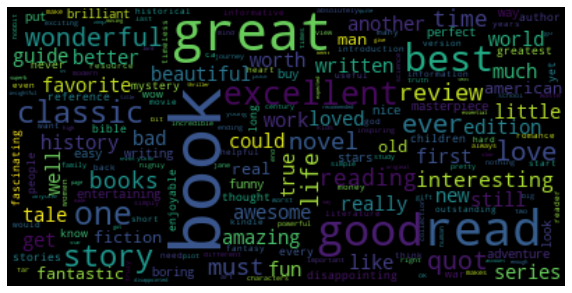

In [95]:
from wordcloud import WordCloud
from PIL import Image
# import matplotlib.pyplot as plt 
word_dict = dict(Counter(top_tokens).most_common())
word_cloud = WordCloud(max_font_size=50, collocations = False, background_color = 'black').generate_from_frequencies(word_dict)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

For a bit of fun, let's shape it in the letters of our favourite subject!

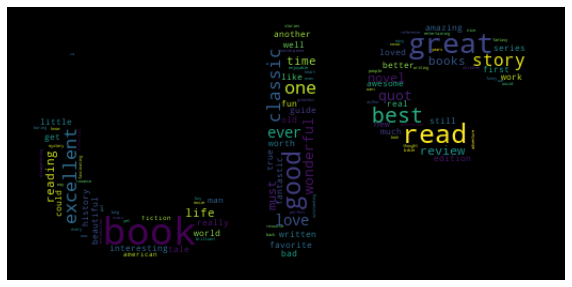

In [94]:
from wordcloud import WordCloud
from PIL import Image
# import matplotlib.pyplot as plt 
word_dict = dict(Counter(top_tokens).most_common())
mask = np.array(Image.open('/content/drive/MyDrive/CIS-logo.jpeg'))
word_cloud = WordCloud(max_font_size=50, collocations = False, background_color = 'black', mask=mask).generate_from_frequencies(word_dict)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Part 3: Data Modeling and Predictions

What features can we use to predict the average rating of a book on Amazon?

<br>
<center><img src = "https://www.modernanalyst.com/Portals/0/Public%20Uploads/Fin387-Data-Mining-Visualization-Modeling.jpg" width= "400" height='300' align ="center"/></center>
<br>

Let's tackle this problem by trying both types of machine learning:


1.   Regression - quantitative response variable
2.   Classification - categorical response variable





### Structuring our Modeling Data Frame

Currently we still have two seperate dataframes. One dataframe `cleaned_books_df` is at the book-level, where each row represents a book. Whereas we still have a review-level dataframe `review_tokens_df`, where each row represents one review of a certain book.

When we model we only want one row per book, so we will have to do group by's of our review-level dataframe, and then merge the two.

First, we will get book-level data from the `review_tokens_df` by averaging the numeric columns such as review_score (this will be our label for regression), `review_percent_helpful`, and `sentiment_score`. Extracting the number of reviews per book may also be helpful in prediction so that will also be extracted.

Our label for regression will be `mean_review_score` but for classification we need to categorize this value.

In [ ]:
review_avgs_df = review_tokens_df[["Title", "review_score", "review_percent_helpful", "sentiment_score"]].groupby(by = "Title").mean().reset_index().rename(columns = {"review_score" : "mean_review_score", "review_percent_helpful" : "mean_review_percent_helpful", "sentiment_score" : "mean_sentiment_score"})

In [ ]:
review_count_df = review_tokens_df[["Title", "review_score"]].groupby(by = "Title").count().reset_index().rename(columns = {"review_score" : "review_count"})

In [ ]:
review_book_level_df = review_avgs_df.merge(review_count_df, on = 'Title')

What is the distribution of mean review score?

In [ ]:
percentiles = np.arange(0, 1.05, 0.05)
for i in range(len(percentiles)):
  print(round(percentiles[i]*100), "th percentile:", review_book_level_df.mean_review_score.quantile(percentiles[i]))

0 th percentile: 1.0
5 th percentile: 2.75
10 th percentile: 3.0
15 th percentile: 3.5
20 th percentile: 3.8
25 th percentile: 4.0
30 th percentile: 4.0
35 th percentile: 4.0
40 th percentile: 4.25
45 th percentile: 4.357142857142857
50 th percentile: 4.5
55 th percentile: 4.555555555555555
60 th percentile: 4.666666666666667
65 th percentile: 4.8
70 th percentile: 5.0
75 th percentile: 5.0
80 th percentile: 5.0
85 th percentile: 5.0
90 th percentile: 5.0
95 th percentile: 5.0
100 th percentile: 5.0


It is important in machine learning to have somewhat balanced classes (ie. same number of observations in each class), however since this dataset has lots of books, we do not have to be as concerned having perfectly balanced classes. 

We notice from above that there are a lot of books (about 30% of them) that have a perfect 5.0 average rating. We are going to classify books as either "Great" or "Not Great". We will classify the top 50% of books as "Great (1)" (mean review score greater than 4.5) and "Not Great (0)" having a mean review score less than or equal to 4.5.

In [ ]:
review_book_level_df['mean_review_score_cat'] = review_book_level_df['mean_review_score'].apply(lambda x: "1" if x > 4.5 else "0")

Although the classes are not perfectly balanced we think this method of ranking review scores will be the most representative of the titles.

In [ ]:
review_book_level_df[["Title", "mean_review_score_cat"]].groupby("mean_review_score_cat").count()

,Title
mean_review_score_cat,
0,114956
1,97445


Moving on to the `cleaned_books_df`, we definitely want to use the numeric features of `ratingsCount`, `num_authors`, and `num_categories` as predictors. As for the categorical features of `publisher`, `categories`, and `published_year` let's first see how many disctinct values we have, since in machine learning we have to one-hot encode our categorical features. 

In [ ]:
n = len(pd.unique(cleaned_books_df["publisher"]))
print("No.of.unique publisher values :", n)

n = len(pd.unique(cleaned_books_df["categories"]))
print("No.of.unique categories values :", n)

n = len(pd.unique(cleaned_books_df["published_year"]))
print("No.of.unique published_year values :", n)

No.of.unique publisher values : 12223
No.of.unique categories values : 3482
No.of.unique published_year values : 166


There are over 12,223 different publishers. But only 60 publishers have over 250 books published on Amazon and only 9 publishers have more than 1,000 books on Amazon. 

We do not want to one-hot encode 12,223 publishers, especially since the majority only publish a handfull of books, but we also do not want to lose some of this publisher information. We will one-hot the publishers with more than 250 books.

In [ ]:
pub_df = cleaned_books_df[["Title", "publisher"]].groupby(["publisher"]).count().reset_index().sort_values("Title", ascending=False)
pub_df.head(10)

,publisher,Title
9971,SimonandSchuster,3425
8412,Penguin,2799
4706,HarperCollins,2463
9425,Routledge,2300
5691,JohnWileySons,1876
1945,CambridgeUniversityPress,1468
6599,Macmillan,1209
2640,CourierCorporation,1113
8021,OpenRoadMedia,983
11426,Vintage,955


In [ ]:
len(pub_df) - len(pub_df[pub_df['Title'] <= 250]) 

60

In [ ]:
#TODO: one-hot encode first 60 publishers
top_pub = pub_df[pub_df['Title'] > 250]['publisher'].tolist()

for i in range(len(top_pub)):
  cleaned_books_df[top_pub[i]] = cleaned_books_df['publisher'].apply(lambda x: 1 if x == top_pub[i] else 0)

Since `categories` also has a lot of distinct values (over 3,000), one-hot encoding every value would not be very smart here. We are going to do similar steps as before. There are 52 categories that have over 250 books in their category, and 54 books that have over 100 books in their category. Let's one-hot encode these top 54 categories.

In [ ]:
cat_df = cleaned_books_df[["Title", "categories"]].groupby(["categories"]).count().reset_index().sort_values("Title", ascending=False)
cat_df.head(10)

,categories,Title
1948,['Fiction'],21096
2259,['History'],8136
3117,['Religion'],7919
2486,['Juvenile Fiction'],6016
739,['Biography & Autobiography'],5478
888,['Business & Economics'],4942
1330,['Computers'],3852
3259,['Social Science'],3353
2487,['Juvenile Nonfiction'],2966
3181,['Science'],2292


In [ ]:
len(cat_df) - len(cat_df[cat_df['Title'] <= 100]) 

54

In [ ]:
#TODO: one-hot encode first 54 categories
top_cat = cat_df[cat_df['Title'] > 100]['categories'].tolist()

for i in range(len(top_cat)):
  cleaned_books_df[top_cat[i]] = cleaned_books_df['categories'].apply(lambda x: 1 if x == top_cat[i] else 0)

Finally, looking at year there are significantly less distinct values as some of our other categorical variables (166), however, since we do not have an extrodinary amount of features, one-hot encoding each year and gaining 165 new features only relating to year will overwhelm the model and probably leave us with a lot of noise.

The majority of books tended to be published between the late 1990s and early 2010s. There are 57 years with more than 100 books published. Let's one-hot encode these years.

In [ ]:
year_df = cleaned_books_df[["Title", "published_year"]].groupby(["published_year"]).count().reset_index().sort_values("Title", ascending=False)
year_df.head(10)

,published_year,Title
145,2004,6295
146,2005,6159
144,2003,5857
143,2002,5447
141,2000,5119
142,2001,4960
153,2012,4926
154,2013,4654
138,1999,4528
152,2011,4312


In [ ]:
len(year_df) - len(year_df[year_df['Title'] <= 100]) 

57

In [ ]:
#TODO: one-hot encode first 57 years
top_year = year_df[year_df['Title'] > 100]['published_year'].tolist()

for i in range(len(top_year)):
  cleaned_books_df[top_year[i]] = cleaned_books_df['published_year'].apply(lambda x: 1 if x == top_year[i] else 0)

Note: there is some ambiguity of what the feature `ratingsCount` actually represents, it seems like neither the number of reviews nor the average review score. We are curious to see if it does stand out within correlations, however our models will not contain this predictor as we have no interpretation of it.

In [ ]:
books_df = cleaned_books_df.drop(columns = ['description', 'authors', 'publisher', 'categories', 'published_year'])
books_df.head(5)

,Title,ratingsCount,num_authors,num_categories,SimonandSchuster,Penguin,HarperCollins,Routledge,JohnWileySons,CambridgeUniversityPress,...,1974,1973,1975,1972,1971,1969,1970,1967,1968,1965
0,Dr. Seuss: American Icon,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Whispers of the Wicked Saints,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Church of Christ: A Biblical Ecclesiology ...,5.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Saint Hyacinth of Poland,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rising Sons and Daughters: Life Among Japan's ...,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
review_book_level_df.head(5)

,Title,mean_review_score,mean_review_percent_helpful,mean_sentiment_score,review_count,mean_review_score_cat
0,""" Film technique, "" and, "" Film acting """,4.500,43.75,0.000,2,0
1,""" We'll Always Have Paris"": The Definitive Gui...",5.000,0.00,4.000,2,1
2,"""... And Poetry is Born ..."" Russian Classical...",4.000,0.00,4.000,1,0
3,"""A Titanic hero"" Thomas Andrews, shipbuilder",4.875,75.00,3.625,8,1
4,"""A Truthful Impression of the Country"": Britis...",4.000,100.00,0.000,1,0


Now let's merge `review_book_level_df` and `books_df` on the book title to get our final dataframe for modeling.

In [ ]:
model_df = books_df.merge(review_book_level_df, on = 'Title', how = 'inner').drop(columns = 'Title')
model_df.head(5)

,ratingsCount,num_authors,num_categories,SimonandSchuster,Penguin,HarperCollins,Routledge,JohnWileySons,CambridgeUniversityPress,Macmillan,...,1969,1970,1967,1968,1965,mean_review_score,mean_review_percent_helpful,mean_sentiment_score,review_count,mean_review_score_cat
0,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4.555556,69.545556,2.000000,9,1
1,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3.718750,45.123750,0.593750,32,0
2,5.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4.500000,71.175000,0.750000,4,0
3,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4.500000,100.000000,2.000000,2,0
4,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4.333333,66.666667,2.333333,3,0


In [ ]:
# for Grace so I don't have to run this code over and over again
# we can remove before submission
from google.colab import files
model_df.to_csv('model3.csv', encoding = 'utf-8-sig') 
files.download('model3.csv')

In [ ]:
model_df = pd.read_csv('/content/drive/MyDrive/model3.csv').iloc[: , 1:]

### Correlations

Let's first construct a correlation matrix of the features that were not one hot encoded.

In [ ]:
# Drop the labels
features = model_df[['ratingsCount', 'num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']]

In [ ]:
corr_matrix = features.corr()
corr_matrix

,ratingsCount,num_authors,num_categories,mean_review_percent_helpful,mean_sentiment_score,review_count
ratingsCount,1.000000,-0.012981,0.004533,-0.025048,-0.002044,0.196716
num_authors,-0.012981,1.000000,-0.008151,-0.002656,-0.000363,-0.019734
num_categories,0.004533,-0.008151,1.000000,0.016698,-0.003837,-0.004007
mean_review_percent_helpful,-0.025048,-0.002656,0.016698,1.000000,0.030642,-0.043217
mean_sentiment_score,-0.002044,-0.000363,-0.003837,0.030642,1.000000,-0.002455
review_count,0.196716,-0.019734,-0.004007,-0.043217,-0.002455,1.000000


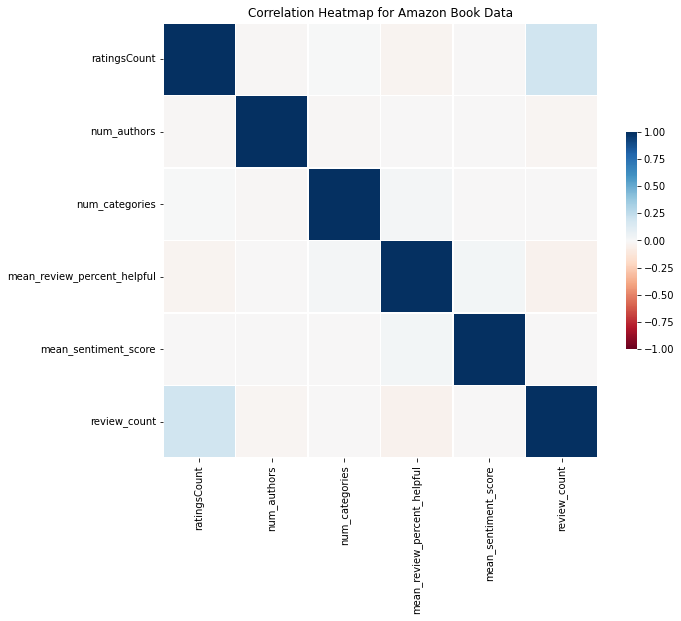

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap = 'RdBu')
plt.title("Correlation Heatmap for Amazon Book Data")
plt.show()  

After reviewing the correlation matrix, we are not too concerned about mutlicolinearity (at least for the features that were not one-hot encoded) since none of the data have more extreme than 0.2 or -0.2. We do not need to do anything to address this issue initially, however the regularization we apply in the linear and logistic regression models will help with the mild multicolinearity. 

Now, let's look at the correlations between our regression response varaible `mean_review_score` and the features. When building linear regression, we do not want to overfit the data by putting in every feature. It is important to see the features that are correlated with the response variable so we can decide which features to include and which to remove.

In [ ]:
features_list = model_df.drop(columns = ['mean_review_score', 'mean_review_score_cat']).columns.tolist()

In [ ]:
top_corr = []
for i in range(len(features_list)):
  if model_df['mean_review_score'].corr(model_df[features_list[i]]) > 0.005 or model_df['mean_review_score'].corr(model_df[features_list[i]]) < -0.005:
    #print("The correlation between mean_review_score and", features_list[i], "is", round(model_df['mean_review_score'].corr(model_df[features_list[i]]), 2))
    top_corr.append(features_list[i])

for i in range(len(features_list)):
  if model_df['mean_review_score'].corr(model_df[features_list[i]]) > 0.02 or model_df['mean_review_score'].corr(model_df[features_list[i]]) < -0.02:
    print("The correlation between mean_review_score and", features_list[i], "is", round(model_df['mean_review_score'].corr(model_df[features_list[i]]), 2))

The correlation between mean_review_score and JohnWileySons is -0.02
The correlation between mean_review_score and McGrawHillProfessional is -0.02
The correlation between mean_review_score and CengageLearning is -0.02
The correlation between mean_review_score and ['Fiction'] is -0.05
The correlation between mean_review_score and ['Religion'] is 0.06
The correlation between mean_review_score and ['Juvenile Fiction'] is 0.05
The correlation between mean_review_score and ['Computers'] is -0.08
The correlation between mean_review_score and ['Juvenile Nonfiction'] is 0.02
The correlation between mean_review_score and ['Cooking'] is 0.02
The correlation between mean_review_score and ['Technology & Engineering'] is -0.02
The correlation between mean_review_score and ['Self-Help'] is 0.02
The correlation between mean_review_score and ['Foreign Language Study'] is -0.03
The correlation between mean_review_score and ['Poetry'] is 0.03
The correlation between mean_review_score and ['Study Aids'] 

Unfortunately for us, there are not very high correlations between our response variable and many of our predictors. The most extreme correlation is between mean review score and mean sentiment score. Hopefully we can still build effective models by implementing techniques we have learned in CIS 5450.

### Test Set

Since we have so many books in our dataset, we are going to take out a true, final test set to run for our 3 final models. This data won't be used in either training the models or validating our hyperparameters. 

In [ ]:
from sklearn.model_selection import train_test_split
features = model_df.drop(columns = ['mean_review_score', 'mean_review_score_cat', 'ratingsCount'])
labels = model_df[['mean_review_score', 'mean_review_score_cat']]
seed = 42
x_train, x_test_final, y_train, y_test_final = train_test_split(features, labels, random_state = seed, test_size = 0.1)

### 3.1 Regression

We are going to try to predict the average review score for a given book using linear regression. 

On top of just simple linear regression we are going to look at regularized linear regression (Lasso, Ridge, Elastic Net).



#### 3.1.1 Linear Regression

First we will attempt a linear regression with all features.

In [ ]:
#Get train and test splits
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_train, y_train[['mean_review_score']], random_state = seed, test_size = 0.2)

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import LinearRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_full = LinearRegression()
reg_full.fit(x_train_reg, y_train_reg)

# TO-DO: Find the R-squared score and store the value
score_full = reg_full.score(x_test_reg, y_test_reg)
print("R-squared:", round(score_full,4))

R-squared: 0.1019


This model does not perform very well. Let's try a subset of features that are the most correlated with `mean_review_score` to make sure we are not overfitting the data.

In [ ]:
reg_corr = LinearRegression()
reg_corr.fit(x_train_reg[top_corr], y_train_reg)

# TO-DO: Find the R-squared score and store the value
score_corr = reg_corr.score(x_test_reg[top_corr], y_test_reg)
print("R-squared:", round(score_corr,4))

R-squared: 0.1026


There is only a marginal improvement in the $R^2$ of the result. Before moving on from classic linear regression, let's add some quadratic terms for the columns that are not one-hot encoded.

In [ ]:
x_train_reg_pow = x_train_reg[top_corr][['num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']].pow(2)
x_train_reg_pow.columns = ['num_authors_2', 'num_categories_2', 'mean_review_percent_helpful_2', 'mean_sentiment_score_2', 'review_count_2']
x_train_reg_pow = pd.concat([x_train_reg_pow, x_train_reg], axis=1)

In [ ]:
x_test_reg_pow = x_test_reg[top_corr][['num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']].pow(2)
x_test_reg_pow.columns = ['num_authors_2', 'num_categories_2', 'mean_review_percent_helpful_2', 'mean_sentiment_score_2', 'review_count_2']
x_test_reg_pow = pd.concat([x_test_reg_pow, x_test_reg], axis=1)

In [ ]:
reg_sq = LinearRegression()
reg_sq.fit(x_train_reg_pow, y_train_reg)

# TO-DO: Find the R-squared score and store the value
score_sq = reg_sq.score(x_test_reg_pow, y_test_reg)
print("R-squared:", round(score_sq,4))

R-squared: 0.1227


Since that was an improvement, let's try a degree 3 model.

In [ ]:
x_train_reg_pow3 = x_train_reg[top_corr][['num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']].pow(3)
x_train_reg_pow3.columns = ['num_authors_3', 'num_categories_3', 'mean_review_percent_helpful_3', 'mean_sentiment_score_3', 'review_count_3']
x_train_reg_pow3 = pd.concat([x_train_reg_pow3, x_train_reg_pow], axis=1)
x_test_reg_pow3 = x_test_reg[top_corr][['num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']].pow(3)
x_test_reg_pow3.columns = ['num_authors_3', 'num_categories_3', 'mean_review_percent_helpful_3', 'mean_sentiment_score_3', 'review_count_3']
x_test_reg_pow3 = pd.concat([x_test_reg_pow3, x_test_reg_pow], axis=1)

In [ ]:
reg_cube = LinearRegression()
reg_cube.fit(x_train_reg_pow3, y_train_reg)

# TO-DO: Find the R-squared score and store the value
score_cube = reg_cube.score(x_test_reg_pow3, y_test_reg)
print("R-squared:", round(score_cube,4))

R-squared: 0.1225


The model with the highest $R^2$ on the testing set had the features with correlations of 0.005 and greater or -0.005 and less, and all the non one-hot encoded features were squared.

The $R^2$ tells us that 12.27% of the variability in mean review score for books from Amazon, can be explained by the linear relationship between mean review score and all the independent variables (features).

Let's now look at regularized linear regression to see if we can improve our model.

####3.1.2 Regularized Linear Regression

We are going to now use regularized linear regression, which adds a penalty term to our model weights. There is Ridge Regression (L2), Lasso Regression (L1), and their trusty combination of Elastic Net Regression (L1 & L2).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

####Lasso

First we are going to fit Lasso linear regression on our full dataset and report the testing $R^2$ for different values of the hyperparameter alpha. Alpha is a constant that determines the strength of the regularization, for example using alpha = 0.0 is just classic linear regression. 

In [ ]:
test_r_sq_full = []
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

for i in range(len(alpha)):
  # TO-DO: Initialize model with default parameters and fit it on the training set
  lasso_full = Lasso(alpha = alpha[i])
  lasso_full.fit(x_train_reg, y_train_reg)

  # TO-DO: Find the R-squared score and store the value
  score_full = lasso_full.score(x_test_reg, y_test_reg)
  test_r_sq_full.append(score_full)

test_r_sq_full

[0.10195563895335835,
 0.10236892479212234,
 0.0980769172057443,
 0.08336919610734439,
 0.07691731548784286,
 0.004833346088102042,
 -2.604080225232508e-06]

We noticed that the highest $R^2$ falls around an alpha = 0.0001.

Let's now focus in on alpha values around there. We will run these Lasso regressions on both the full dataset and the dataset reduced with the top correlated features.

In [ ]:
test_r_sq_full = []
alpha = [0.000009, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, 0.0002]

for i in range(len(alpha)):
  # TO-DO: Initialize model with default parameters and fit it on the training set
  lasso_full = Lasso(alpha = alpha[i])
  lasso_full.fit(x_train_reg, y_train_reg)

  # TO-DO: Find the R-squared score and store the value
  score_full = lasso_full.score(x_test_reg, y_test_reg)
  test_r_sq_full.append(score_full)

test_r_sq_full

[0.10194936309357461,
 0.10195563895335835,
 0.1019897268192167,
 0.10200653172699947,
 0.10206976898184128,
 0.1021190071548751,
 0.10217114272273553,
 0.10223039264479372,
 0.10228685012625971,
 0.10233880979632248,
 0.10236892479212234,
 0.10236740244923015]

In [ ]:
test_r_sq_red = []
alpha = [0.000009, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, 0.0002]

for i in range(len(alpha)):
  # TO-DO: Initialize model with default parameters and fit it on the training set
  lasso_red = Lasso(alpha = alpha[i])
  lasso_red.fit(x_train_reg[top_corr], y_train_reg)

  # TO-DO: Find the R-squared score and store the value
  score_red = lasso_red.score(x_test_reg[top_corr], y_test_reg)
  test_r_sq_red.append(score_red)

test_r_sq_red

[0.1026067224820093,
 0.10261048932729933,
 0.10264332942297105,
 0.10267225507103761,
 0.1026950833039193,
 0.10270647124249854,
 0.10270877196399641,
 0.10271034142922164,
 0.10270676089339126,
 0.10269621462556067,
 0.10268467674043491,
 0.1024304169454795]

In [ ]:
lasso_df_full = pd.DataFrame({'R-Squared' : test_r_sq_full, 'alpha' : alpha})
lasso_df_full['Model'] = "Full"
lasso_df_red = pd.DataFrame({'R-Squared' : test_r_sq_red, 'alpha' : alpha})
lasso_df_red['Model'] = "Reduced"
lasso_df = pd.concat([lasso_df_full, lasso_df_red]).reset_index()

Text(0.5, 1.0, 'R-Squared of Lasso Regression at Given Alpha for Full and Reduced Model')

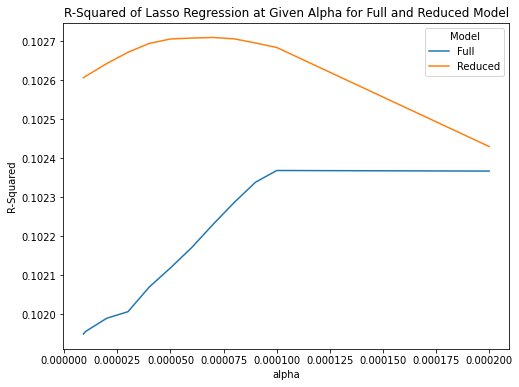

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data = lasso_df, x = 'alpha', y = 'R-Squared', hue = 'Model')
plt.title("R-Squared of Lasso Regression at Given Alpha for Full and Reduced Model")

Overall, we noticed that the reduced model tends to have higher $R^2$ than the full model for Lasso linear regression. We found the optimal alpha value to be 0.00007. This model has an $R^2$ of 0.10271.

#### Ridge

Next we are going to fit Ridge linear regression on our full dataset and report the testing $R^2$ for different values of the hyperparameter alpha.

In [ ]:
test_r_sq_full = []
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

for i in range(len(alpha)):
  # TO-DO: Initialize model with default parameters and fit it on the training set
  ridge_full = Ridge(alpha = alpha[i])
  ridge_full.fit(x_train_reg, y_train_reg)

  # TO-DO: Find the R-squared score and store the value
  score_full = ridge_full.score(x_test_reg, y_test_reg)
  test_r_sq_full.append(score_full)

test_r_sq_full

[0.10191153900812788,
 0.1019115391608224,
 0.10191154068796937,
 0.10191155597952595,
 0.1019117108906944,
 0.1019134468681494,
 0.1019405366179259,
 0.10193515769673755,
 0.09856111199494655]

We noticed that the highest $R^2$ falls somewhere between an alpha = 10.0 and alpha = 100.0.

Let's now focus in on alpha values around there. We will run these Ridge regressions on both the full dataset and the dataset reduced with the top correlated features.

In [ ]:
test_r_sq_full = []
alpha = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

for i in range(len(alpha)):
  # TO-DO: Initialize model with default parameters and fit it on the training set
  ridge_full = Ridge(alpha = alpha[i])
  ridge_full.fit(x_train_reg, y_train_reg)

  # TO-DO: Find the R-squared score and store the value
  score_full = ridge_full.score(x_test_reg, y_test_reg)
  test_r_sq_full.append(score_full)

test_r_sq_full

[0.10191153899116212,
 0.1019241090370161,
 0.1019405366179259,
 0.10195714053076788,
 0.10197227531953046,
 0.10198522609184302,
 0.10199572349865615,
 0.10200371944294095,
 0.10200927713047103,
 0.10201251454997462,
 0.10201357440563774,
 0.10201260779174182,
 0.10200976528681394,
 0.10200519217395354,
 0.10199902600463961,
 0.10199139550996639,
 0.10198242028834048,
 0.10197221093575026,
 0.10196086942053117]

In [ ]:
test_r_sq_red = []
alpha = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

for i in range(len(alpha)):
  # TO-DO: Initialize model with default parameters and fit it on the training set
  ridge_red = Ridge(alpha = alpha[i])
  ridge_red.fit(x_train_reg[top_corr], y_train_reg)

  # TO-DO: Find the R-squared score and store the value
  score_red = ridge_red.score(x_test_reg[top_corr], y_test_reg)
  test_r_sq_red.append(score_red)

test_r_sq_red

[0.10256893958561719,
 0.10259062747677028,
 0.10260626644600734,
 0.10261670917353871,
 0.10262265743062227,
 0.10262469580410472,
 0.10262331633518407,
 0.10261893689454449,
 0.10261191513768031,
 0.10260255927613882,
 0.10259113651190865,
 0.10257787972783816,
 0.10256299285669634,
 0.10254665523524464,
 0.10252902516882545,
 0.10251024287482613,
 0.10249043293232507,
 0.10246970633535468,
 0.10244816222516417]

In [ ]:
ridge_df_full = pd.DataFrame({'R-Squared' : test_r_sq_full, 'alpha' : alpha})
ridge_df_full['Model'] = "Full"
ridge_df_red = pd.DataFrame({'R-Squared' : test_r_sq_red, 'alpha' : alpha})
ridge_df_red['Model'] = "Reduced"
ridge_df = pd.concat([ridge_df_full, ridge_df_red]).reset_index()

Text(0.5, 1.0, 'R-Squared of Ridge Regression at Given Alpha for Full and Reduced Model')

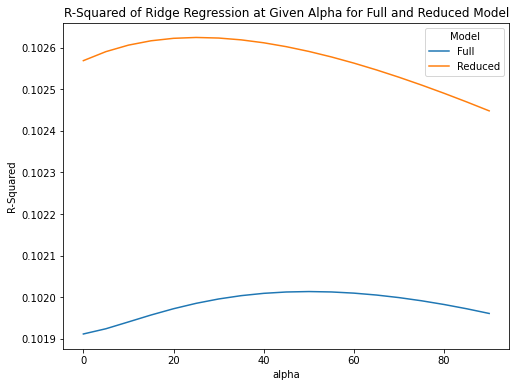

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data = ridge_df, x = 'alpha', y = 'R-Squared', hue = 'Model')
plt.title("R-Squared of Ridge Regression at Given Alpha for Full and Reduced Model")

Overall, we noticed that the reduced model tends to have higher $R^2$ than the full model for Ridge linear regression, just like with Lasso. We found the optimal alpha value to be 25. This model has an $R^2$ of 0.10262, which is slightly lower than with Lasso regression.

#### Elastic Net

Our final step for linear regression is looking at the elactic net model which combines both Lasso and Ridge regression penalties. We now have 2 hyperparameters to tune, alpha like before, and now also the l1_ratio. When the l1_ration = 0, we have Ridge regression and when l1_ratio = 1 we have Lasso regression.

In [ ]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
l1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
test_r_sq_red = []

for i in range(len(alpha)):
  for j in range(len(l1)):
    # TO-DO: Initialize model with default parameters and fit it on the training set
    en_red = ElasticNet(alpha = alpha[i], l1_ratio = l1[j])
    en_red.fit(x_train_reg[top_corr], y_train_reg)

    # TO-DO: Find the R-squared score and store the value
    score_red = en_red.score(x_test_reg[top_corr], y_test_reg)
    test_r_sq_red.append(score_red)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+04, tolerance: 5.451e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+04, tolerance: 5.451e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

In [ ]:
rsq = np.array(test_r_sq_red)
rsq = rsq.reshape(7,11)
elastic_net_df = pd.DataFrame(rsq, index = alpha, columns = l1)

In [ ]:
elastic_net_df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.00001,0.102573,0.102577,0.102581,0.102585,0.102589,0.102593,0.102596,0.102600,0.102604,0.102607,0.102610
0.00010,0.102603,0.102633,0.102657,0.102679,0.102697,0.102705,0.102706,0.102706,0.102703,0.102694,0.102685
0.00100,0.102461,0.102268,0.101909,0.101514,0.101068,0.100492,0.099909,0.099319,0.098846,0.098404,0.098055
0.01000,0.099048,0.095216,0.092745,0.091722,0.090967,0.090042,0.088928,0.087605,0.086322,0.084953,0.083369
0.10000,0.090048,0.082443,0.081503,0.081367,0.081113,0.080738,0.080239,0.079611,0.078851,0.077954,0.076917
1.00000,0.076678,0.063167,0.043473,0.014235,0.005272,0.005281,0.005259,0.005203,0.005114,0.004991,0.004833
10.00000,0.029282,0.004812,0.001379,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003


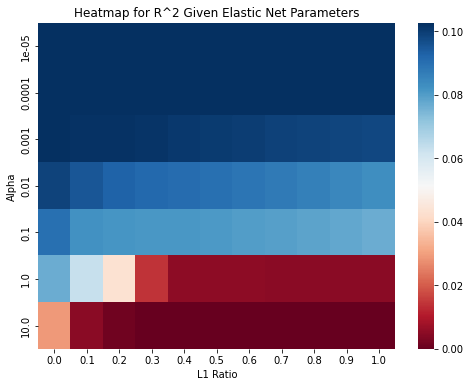

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(elastic_net_df, cmap = 'RdBu')
plt.title("Heatmap for R^2 Given Elastic Net Parameters")
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.show() 

The highest $R^2$ for Elastic Net is 0.10271 for an alpha = 0.0001 and an L1 ratio = 0.7 or 0.6. This is identical to our highest $R^2$ for Lasso regression, and higher than that of the Ridge regression.

We will conclude that our best regularized regression model is Lasso (rather than Elastic Net since it's simpler) with an alpha = 0.00007. For our final regression model, we will fit this Lasso model on our quadratic data.

In [ ]:
lasso_sq = Lasso(alpha = 0.00007)
lasso_sq.fit(x_train_reg_pow, y_train_reg)

# TO-DO: Find the R-squared score and store the value
score_sq = lasso_sq.score(x_test_reg_pow, y_test_reg)
print("R-squared:", round(score_sq,4))

R-squared: 0.123


Coming in with an $R^2$ of 0.123, this is the best regression model!

Overall, regression does not seem to do very well with the Amazon books data. It is very hard to predict the mean review score for a book with any or all of the features we have. We believe that this partially has to do with the sheer quantity of books, there might be more noise than signal in our dataset.

We are excited to begin looking into classification models, as predicting a binary output relating to mean review score may have more success than predicting the mean review score numerically.

###3.2 Classification

When we run classification models we have a categorical label. We have labeled a book with a mean review score greater than 4.5 as a 1, and all other books as a 0. There is a 50/50 split of observations in each of the two classes. We will look at both Logistic Regression (with and without regularization), as well as Random Forrests to find an optimal classification model.

*Note:* there are many metrics you can use to evaluate the performance of classification models (percision, recall, F1, auc, etc.), however since our classes are perfectly balanced and we don't have any strong importance placed on either of our labels, we chose accuracy to be the metric of comparison.

####3.2.1 Logistic Regression

In [ ]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_train, y_train[['mean_review_score_cat']], random_state = seed, test_size = 0.2)

Let's first train and test Logistic Regression on both our full and reduced datasets and compare the test accuracy.

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import LogisticRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
logreg = LogisticRegression(max_iter=1000, penalty='none')
logreg.fit(x_train_class, y_train_class.values.ravel())

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = logreg.score(x_test_class, y_test_class.values.ravel())
log_acc

0.6263099834528406

In [ ]:
# TO-DO: Initialize model with default parameters and fit it on the training set
logreg = LogisticRegression(max_iter=1000, penalty='none')
logreg.fit(x_train_class[top_corr], y_train_class.values.ravel())

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc_red = logreg.score(x_test_class[top_corr], y_test_class.values.ravel())
log_acc_red

0.6253906968192683

It looks like the full model tends to perfrom better than the reduced model, which is a difference from our linear regression. From now on let's only look at the regressions for the full dataset.

Next, we want to compare Ridge and Lasso regularization. We are going to need to hyperparameter tune 'C', which is the inverse of the regularization strength. Think of it as 1/alpha when comparing this case to our regularized linear regression models.

In [ ]:
#Ridge
C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #inverse of regularization strength
test_acc = []

for i in range(len(C)):
    # TO-DO: Initialize model with default parameters and fit it on the training set
    logreg = LogisticRegression(max_iter=1000, penalty='l2', C = C[i])
    logreg.fit(x_train_class, y_train_class.values.ravel())

    # TO-DO: Find the  accuracy score and store the value
    score = logreg.score(x_test_class, y_test_class.values.ravel())
    test_acc.append(score)

test_acc

[0.6138076852362566,
 0.6282864497150211,
 0.629021879021879,
 0.6267236624379482,
 0.6268155911013054,
 0.6264938407795551,
 0.6267236624379482]

In [ ]:
#Lasso
C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #inverse of regularization strength
test_acc_lasso = []

for i in range(len(C)):
    # TO-DO: Initialize model with default parameters and fit it on the training set
    logreg = LogisticRegression(max_iter=1000, penalty='l1', C = C[i], solver = 'liblinear')
    logreg.fit(x_train_class, y_train_class.values.ravel())

    # TO-DO: Find the  accuracy score and store the value
    score = logreg.score(x_test_class, y_test_class.values.ravel())
    test_acc_lasso.append(score)

test_acc_lasso

[0.5649476006618864,
 0.6204725133296561,
 0.6277808420665564,
 0.6280566280566281,
 0.6266776981062695,
 0.6272752344180915,
 0.6272752344180915]

In [ ]:
ridge_df = pd.DataFrame({'Accuracy' : test_acc, 'C' : C})
ridge_df['Regularization'] = "Ridge"
lasso_df = pd.DataFrame({'Accuracy' : test_acc_lasso, 'C' : C})
lasso_df['Regularization'] = "Lasso"
df = pd.concat([ridge_df, lasso_df]).reset_index()

(0.55, 0.635)

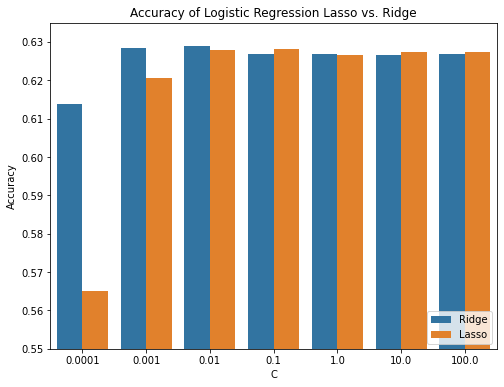

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data = df, x = 'C', y = 'Accuracy', hue = 'Regularization')
plt.title("Accuracy of Logistic Regression Lasso vs. Ridge")
plt.legend(loc='lower right')
plt.ylim((0.55,0.635))

The accuracies are overall pretty similiar, besides with a very small value of C. When C is smaller, Lasso tends to do worse than Ridge. The highest accuracy was 0.629 for Ridge logistic regression, at an C = 0.01.

For logistic regression in SKLearn, Elastic Net regularization works with a different, and much slower solver called "saga". We cannot test as many values of our hyperparameters l1_ratio and C as we would like. However, since we know how the model performs on the extreme ends of the l1_ratio, we can keep these values more centralized to 0.5, as well as trying 3 values for C.

In [ ]:
C = [0.001, 1.0, 100.0] #inverse of regularization strength
l1 = [0.25, 0.5, 0.75]
test_acc = []

for i in range(len(C)):
  for j in range(len(l1)):
    # TO-DO: Initialize model with default parameters and fit it on the training set
    logreg = LogisticRegression(max_iter=500, penalty='elasticnet', C = C[i], l1_ratio = l1[j], solver = "saga")
    logreg.fit(x_train_class, y_train_class.values.ravel())

    # TO-DO: Find the  accuracy score and store the value
    score = logreg.score(x_test_class, y_test_class.values.ravel())
    test_acc.append(score)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

In [ ]:
acc = np.array(test_acc)
acc = acc.reshape(3,3)
elastic_net_df = pd.DataFrame(acc, index = C, columns = l1)

elastic_net_df

,0.25,0.50,0.75
0.001,0.579197,0.579243,0.579288
1.000,0.579243,0.579288,0.579243
100.000,0.579243,0.579288,0.579243


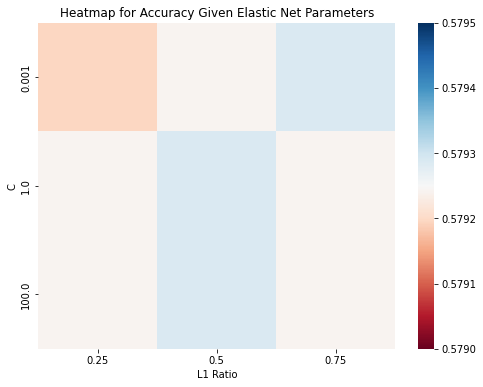

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(elastic_net_df, cmap = 'RdBu', vmin=0.579, vmax=0.5795)
plt.title("Heatmap for Accuracy Given Elastic Net Parameters")
plt.xlabel("L1 Ratio")
plt.ylabel("C")
plt.show()

All the Elatic Net accuracies are extremely similar, however none of them are as good as the accuracies we were seeing with just Ridge and Lasso on their own.

Overall, the best model based on accracy was Ridge logistic regression with C = 0.01. The accuracy of 0.629 means that with this model we were able to predict 62.9% of the test books correctly. While this accuracy is not very close to 100%, our model does have some lift. We are doing much better than classifying books at random to be above and below 4.5 mean review score.

#### 3.2.2 Random Forest

For our second type of classification model we will try Random Forest, which is an ensemble method of Decision Trees using the idea of bagging. 

There are many parameters involved in Random Forest, however there is a consensus on the 2 most important hyperparameters to tune: n_estimators (how many decision trees in the forrest) and max_depth (maximum depth of trees).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [50, 100, 150, 200, 500] 
max_depth = [5, 10, 15, 20, 25, 30]
test_acc = []

for i in range(len(n_estimators)):
  for j in range(len(max_depth)):
    # TO-DO: Initialize model with default parameters and fit it on the training set
    rand_f = RandomForestClassifier(n_estimators = n_estimators[i], max_depth = max_depth[j])
    rand_f.fit(x_train_class, y_train_class.values.ravel())

    # TO-DO: Find the  accuracy score and store the value
    score = rand_f.score(x_test_class, y_test_class.values.ravel())
    test_acc.append(score)

In [ ]:
acc = np.array(test_acc)
acc = acc.reshape(5,6)
rand_f_df = pd.DataFrame(acc, index = n_estimators, columns = max_depth)

rand_f_df

,5,10,15,20,25,30
50,0.609717,0.642581,0.651958,0.654394,0.656233,0.654440
100,0.620610,0.636468,0.648557,0.654762,0.657796,0.657106
150,0.617853,0.636284,0.648327,0.655727,0.659174,0.658393
200,0.617577,0.638628,0.652510,0.654670,0.659450,0.658485
500,0.618036,0.640283,0.650211,0.654992,0.657382,0.658991


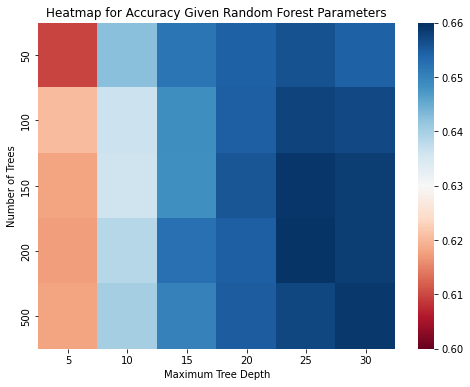

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(rand_f_df, cmap = 'RdBu', vmin=0.6, vmax=0.66)
plt.title("Heatmap for Accuracy Given Random Forest Parameters")
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Number of Trees")
plt.show()

Our first go around of random forest was very successful! We are seeing much higher values of accuracy than even with logisitic regression. The accuracies tend to improve with the number of trees and with the maximum tree depth. However, the best model had a max depth of 25 and 200 for the number of trees.

We are going to tune close to these values before settling on our best random forest model.

In [ ]:
n_estimators = [175, 200, 225, 250, 275, 300] 
max_depth = [20, 25, 30, 35, 40, 45]
test_acc = []

for i in range(len(n_estimators)):
  for j in range(len(max_depth)):
    # TO-DO: Initialize model with default parameters and fit it on the training set
    rand_f = RandomForestClassifier(n_estimators = n_estimators[i], max_depth = max_depth[j])
    rand_f.fit(x_train_class, y_train_class.values.ravel())

    # TO-DO: Find the  accuracy score and store the value
    score = rand_f.score(x_test_class, y_test_class.values.ravel())
    test_acc.append(score)

In [ ]:
acc = np.array(test_acc)
acc = acc.reshape(6,6)
rand_f_df = pd.DataFrame(acc, index = n_estimators, columns = max_depth)

rand_f_df

,20,25,30,35,40,45
175,0.655038,0.657520,0.659037,0.659680,0.659588,0.660094
200,0.655589,0.656922,0.660553,0.659864,0.659220,0.658853
225,0.656692,0.658347,0.658393,0.659956,0.660737,0.658255
250,0.657198,0.658577,0.658347,0.660094,0.660507,0.659312
275,0.655359,0.658393,0.658669,0.660416,0.660645,0.660507
300,0.656141,0.657979,0.659174,0.658025,0.659910,0.660048


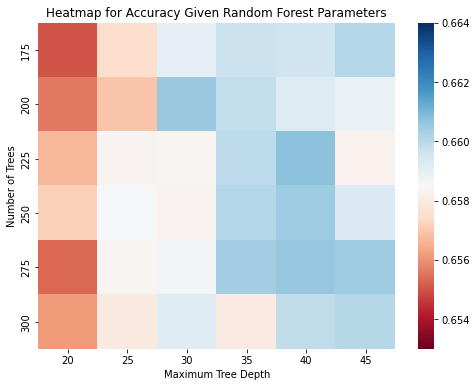

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(rand_f_df, cmap = 'RdBu', vmin=0.653, vmax=0.664)
plt.title("Heatmap for Accuracy Given Random Forest Parameters")
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Number of Trees")
plt.show()

With an accuracy of 0.6607 our best model is a random forest classifier with n_estimators = 225 and max_depth = 40. This model is a very strong improvement from our logistic regression model.

### 3.3 Final Models on Test Set

Are you ready for the *ultimate* test?

Remember, we saved 10% of the data at the very start of the modelling process which was never touched until now.

We will fit the best linear regression, logistic regression, and random forrest models on the entire training data (including the validation data we used previously). We use validation sets to avoid overfitting on training sets, but sometimes we can even overfit on those validation sets. This test set of data is completely pure, and we want to see how our final 3 models run on this data.

#### 3.3.1 Linear Regression  - The Final Test

First, we need to create the quadratic testing and training sets. 

In [ ]:
x_train_pow = x_train[top_corr][['num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']].pow(2)
x_train_pow.columns = ['num_authors_2', 'num_categories_2', 'mean_review_percent_helpful_2', 'mean_sentiment_score_2', 'review_count_2']
x_train_pow = pd.concat([x_train_pow, x_train], axis=1)
x_test_pow = x_test_final[top_corr][['num_authors', 'num_categories', 'mean_review_percent_helpful', 'mean_sentiment_score', 'review_count']].pow(2)
x_test_pow.columns = ['num_authors_2', 'num_categories_2', 'mean_review_percent_helpful_2', 'mean_sentiment_score_2', 'review_count_2']
x_test_pow = pd.concat([x_test_pow, x_test_final], axis=1)

Then, we will train our best linear regression model (Lasso, alpha = 0.00007) and test it.

In [ ]:
lasso_sq = Lasso(alpha = 0.00007)
lasso_sq.fit(x_train_pow, y_train['mean_review_score'])

# TO-DO: Find the R-squared score and store the value
score_sq = lasso_sq.score(x_test_pow, y_test_final['mean_review_score'])
score_sq_train = lasso_sq.score(x_train_pow, y_train['mean_review_score'])
print("Training R-squared:", round(score_sq_train,4))
print("Testing R-squared:", round(score_sq,4))

Training R-squared: 0.1407
Testing R-squared: 0.1246


Wow! Our testing $R^2$ is even higher than it was when we were validating our model. This lets us know that we did not overfit on our validation data earlier. We will call this a success!

#### 3.3.2 Logistic Regression - The Final Test

Let's fit our Ridge Logistic Regression model with C = 0.01 on our entire training dataset and test it.

In [ ]:
logreg = LogisticRegression(max_iter=1000, penalty='l2', C = 0.01)
logreg.fit(x_train, y_train['mean_review_score_cat'].values.ravel())

# TO-DO: Find the accuracy score and store the value
score = logreg.score(x_test_final, y_test_final['mean_review_score_cat'].values.ravel())
score_train = logreg.score(x_train, y_train['mean_review_score_cat'].values.ravel())
print("Training Accuracy:", round(score_train,4))
print("Testing Accuracy:", round(score,4))

Training Accuracy: 0.6292
Testing Accuracy: 0.6207


We are pleased to see that the testing accuracy is relatively close to the training accuracy, an indication that we did not overfit. This testing accuracy is not too far off of what we were seeing while validating the model, which is good. We still are able to predict whether books have a mean review score above 4.5 or below 4.5 with more accuracy than a random guess.

Let's create a confusion matrix for our testing predictions. Remember a label of 1 indicates a book with a mean review score greater than 4.5, while 0 represents a book with a mean review score less than or equal to 4.5.

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(x_test_final)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test_final['mean_review_score_cat'], y_pred))
confusion_matrix_df 

,0,1
0,5438,1432
1,3153,2064


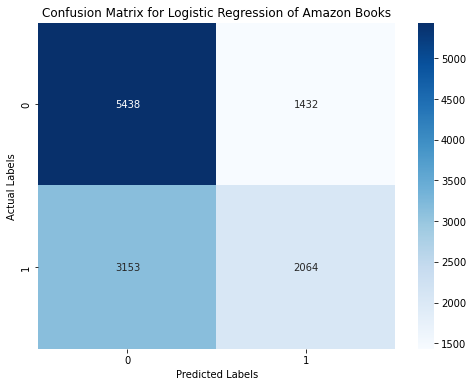

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix for Logistic Regression Model of Amazon Book Revies")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()  

By looking at the confusion matrix, we can tell that our model predicted that a book had a label of 0 (mean review score <= 4.5) way more often than it predicted a book with a label of 1. Of the books that were actually rated 4.5+ on average, the model predicted less than half of these correctly.

#### 3.3.3 Random Forest - The Final Test

Let's fit our best Random Forest model on the entire training dataset and test it.

In [ ]:
# TO-DO: Initialize model with default parameters and fit it on the training set
rand_f = RandomForestClassifier(n_estimators = 225, max_depth = 40)
rand_f.fit(x_train, y_train['mean_review_score_cat'].values.ravel())

# TO-DO: Find the  accuracy score and store the value
score = rand_f.score(x_test_final, y_test_final['mean_review_score_cat'].values.ravel())
score_train = rand_f.score(x_train, y_train['mean_review_score_cat'].values.ravel())
print("Training Accuracy:", round(score_train,4))
print("Testing Accuracy:", round(score,4))

Training Accuracy: 0.8494
Testing Accuracy: 0.6591


Wow, the training accuracy is incredibly high. Many decision tree based models can overfit on the training data, but that doesn't mean they still don't do exceedingly well on the test data. This Random Forest classifier is better than the Logistic Regression classifier by almost 4% accuracy. 

In [ ]:
y_pred = rand_f.predict(x_test_final)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test_final['mean_review_score_cat'], y_pred))
confusion_matrix_df 

,0,1
0,5084,1786
1,2335,2882


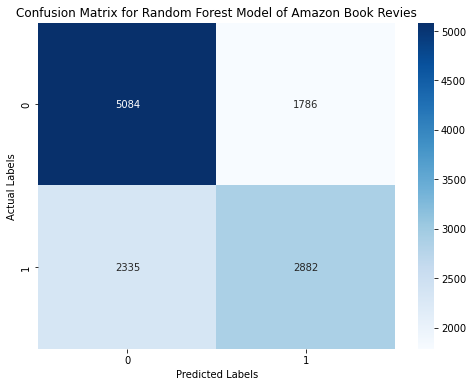

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix for Random Forest Model of Amazon Book Revies")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()  

Finally, examining the confusion matrix, and especially after comparing it to the Logistic Regression's, we can be confident this is the better classification model all around. Not only does it have a higher accuracy, but the diagonals (correctly predicted books) contain more observations than the off diagonals. Our results are more balanced.

We trust this RF classifier to predict a book correctly (whether or not the mean review score is above 4.5) 65.9% of the time.

## Conclusion

# THE END!

Thank you for following along on our incredible journey! It is our sincere hope that you can now find a book whose pages you can lose yourself in, and finally say that you did do your 'reading'! Happy holidays! 
- Grace, Kofi, Naomi 


<br>
<center><img src = "https://ih1.redbubble.net/image.1016783569.8606/pp,504x498-pad,600x600,f8f8f8.jpg" width= "500" height='400' align ="center"/></center>
<br>